## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

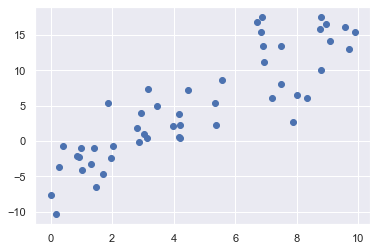

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))
plt.scatter(x, y)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

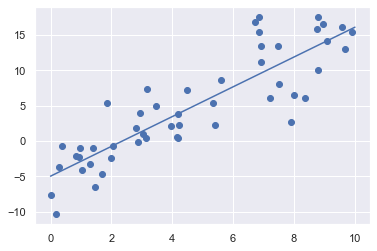

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [19]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.108835241442782
Model intercept: -4.994308342212822


We see that the results are very close to the inputs, as we might hope.

# The Math of Regression

Linear regression is the line where the square of the distance to points in the dataset is the minimum.

So if we take the distance between our line and data points, the square of these should be the minimum possible:

![](Linear_least_squares_example2.png)

There are many algorithms to fit a linear regression, and we'll see most of them in module 3.

# outliers

Because linear regression is based on the square of the distance, it's subject to being pushed around by outlier values (observations on the far right or left of the distribution)

Model slope:     3.056145864897172
Model intercept: -7.726365207615313


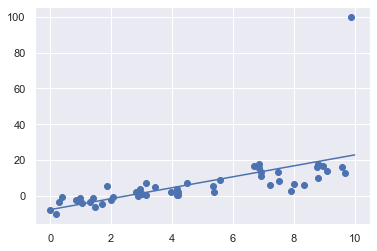

In [20]:
# Create an outlier at the end
y[np.argmax(x)] = 100.

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit)

We can see the slope increases by 1.5x and the intercept reduces by a similar amount.

We could minimize the raw distance or some other metric (these are called **loss functions**) but squared distance have [nice statistical properties](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) that make it desireable.

Moreover, we can alway use strategies to deal with outlier problems. Rescaling the y axis to achieve the same effect as using the direct loss norm while still keeping the squared loss norm will dampen outliers:

Model slope:     0.5134359352380272
Model intercept: -0.4053107567476806


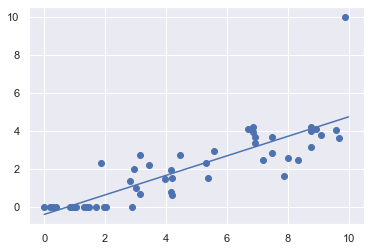

In [21]:
# Square root y with negative values
y = np.sqrt(np.abs(y)) * (y >= 0)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.scatter(x, y)
plt.plot(xfit, yfit)

# Multidimensional data

This is called **simple regression** (regression on one variable).

Generally we want to do **multiple** or Multidimensional regression, to take into account many features. The best way to do this is by learning some matrix math first.